In [1]:
import os
import pyarrow.parquet as pq
import pandas as pd



table = pq.read_table('/Users/tillo/DataScienceRepo/Project_DS_CO2/data/EU all_dtypes_Tan_NaN_float32.parquet')

# In pandas DataFrame umwandeln
df_big = table.to_pandas()

# Den Inhalt anzeigen
#print(df.head())


NameError: name 'df' is not defined

In [8]:
df_big.head()
print(df_big.columns)
df_big.shape

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'ech', 'RLFI', 'Electric range (km)',
       '#identical occurences'],
      dtype='object')


(14442792, 41)

In [11]:
filtered_df = df_big[(df_big['Country'] == 'FR') & (df_big['year'] == 2023)]
filtered_df.shape

(148510, 41)

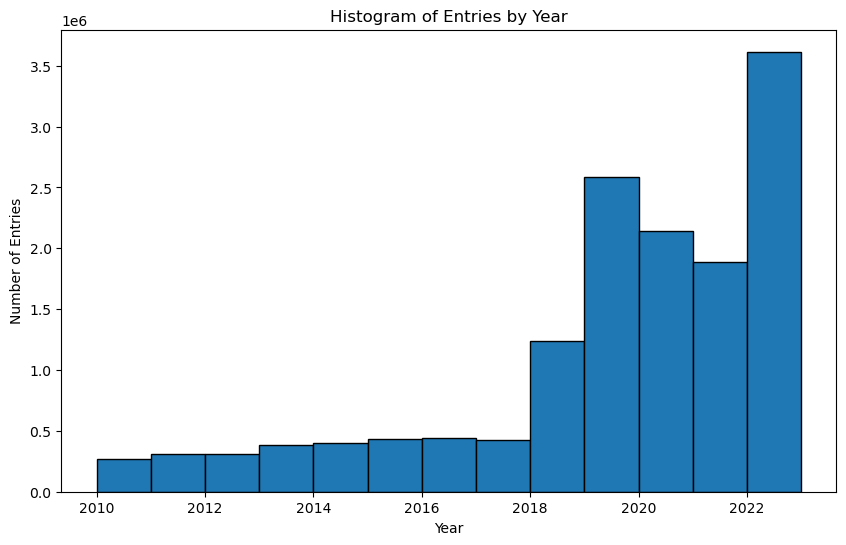

In [2]:

import matplotlib.pyplot as plt

# Histogramm der 'Year'-Spalte im gefilterten DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df_big['year'], bins=13, edgecolor='black')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries by Year')

# Plot anzeigen
plt.show()


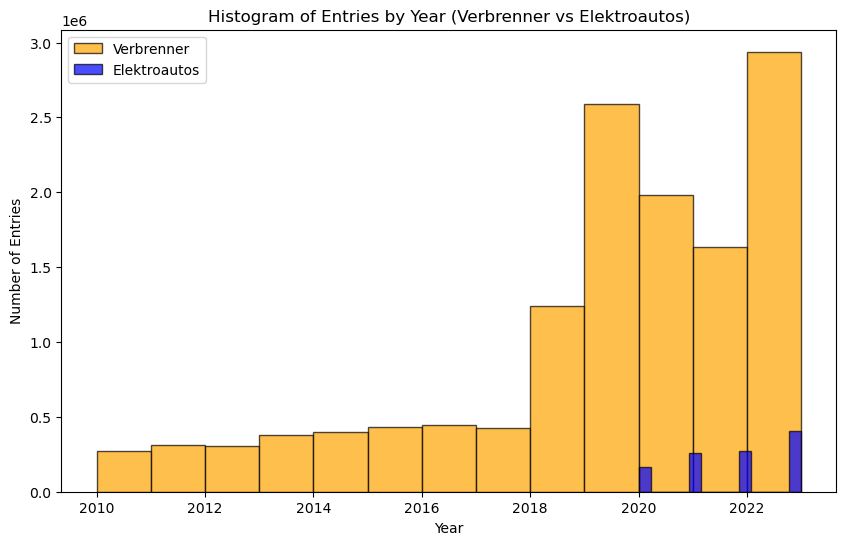

In [62]:

# Separate die Fahrzeuge nach Electric range (km) in Verbrenner und Elektroautos
verbrenner = df_big[df_big['Electric range (km)'].isna()]
elektroautos = df_big[~df_big['Electric range (km)'].isna()]

# Histogramm erstellen
plt.figure(figsize=(10, 6))

# Verbrenner plotten (Electric range (km) = NaN)
plt.hist(verbrenner['year'], bins=13, alpha=0.7, label='Verbrenner', edgecolor='black', color='orange', stacked=True)

# Elektroautos plotten (Electric range (km) != NaN)
plt.hist(elektroautos['year'], bins=13, alpha=0.7, label='Elektroautos', edgecolor='black', color='blue', stacked=True)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries by Year (Verbrenner vs Elektroautos)')

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()



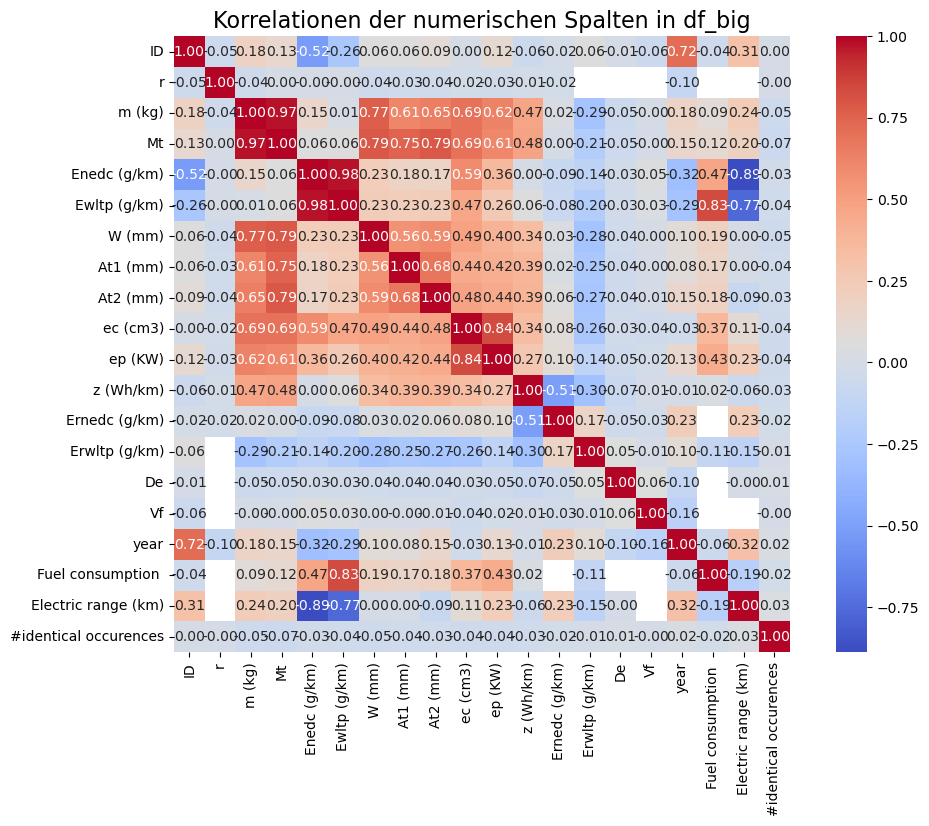

In [63]:
import seaborn as sns


# Korrelationen der numerischen Spalten berechnen
correlation_matrix = df_big.corr()


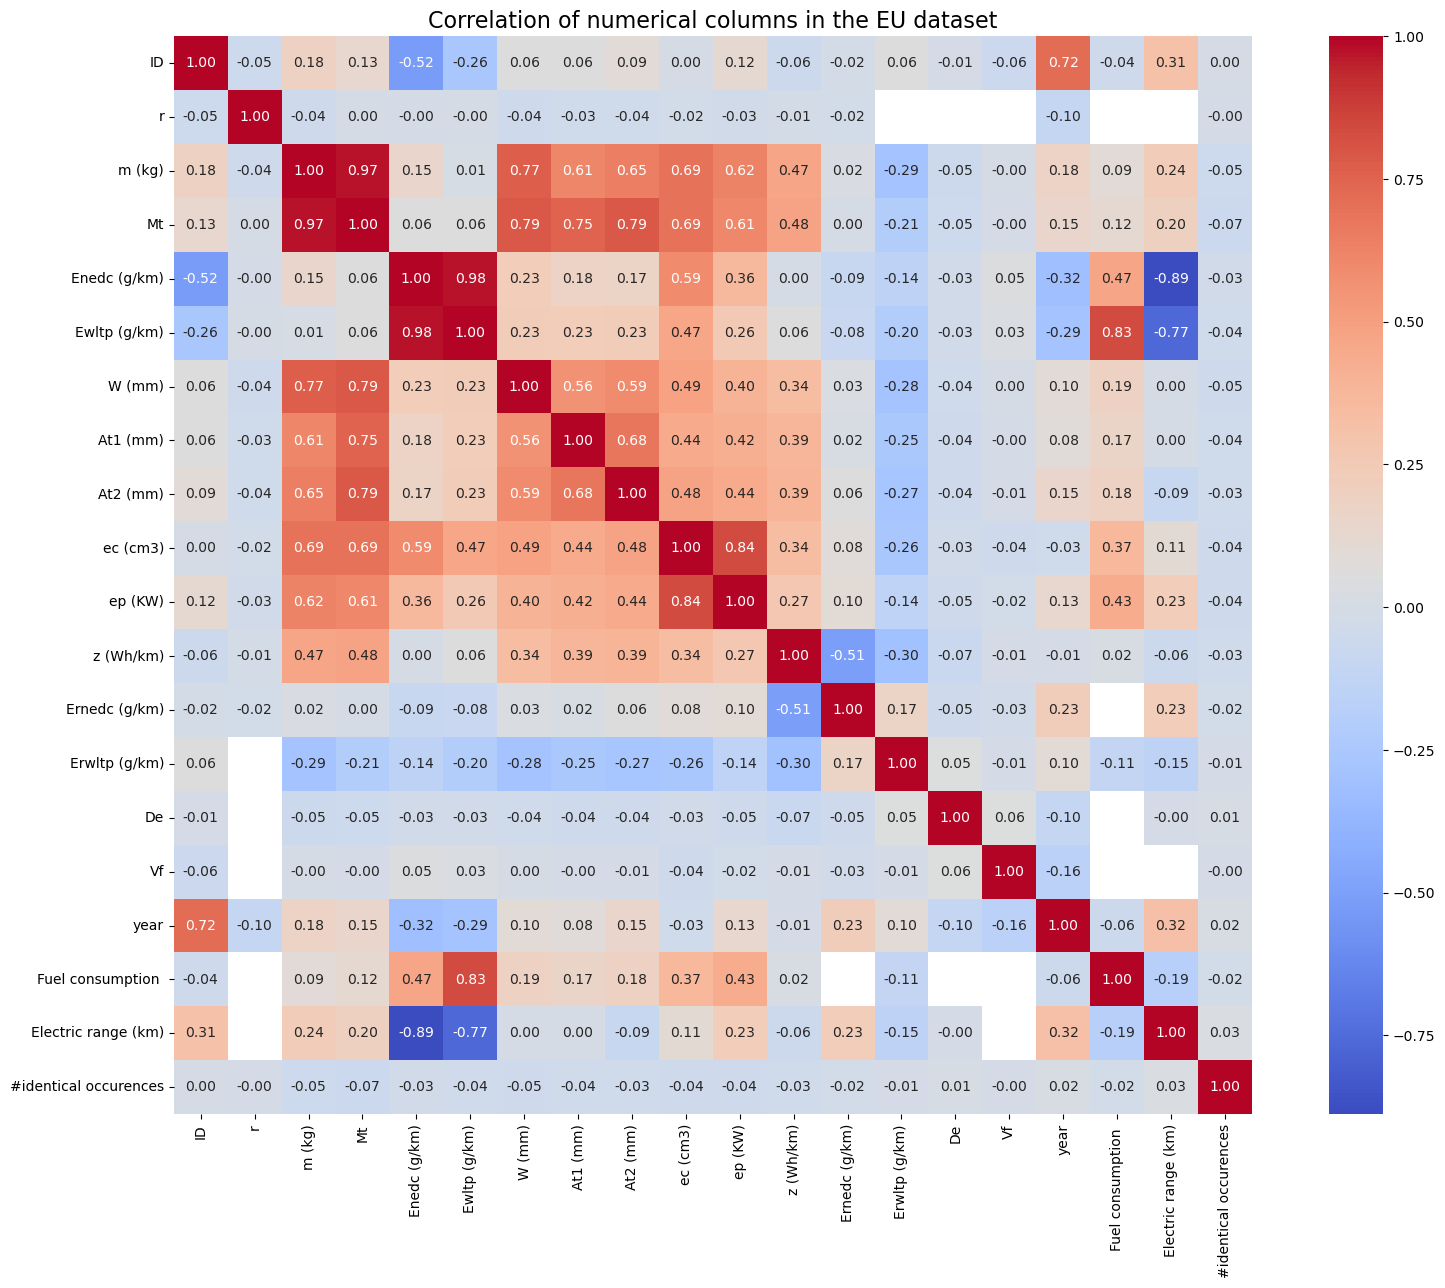

In [65]:

# Heatmap erstellen
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Correlation of numerical columns in the EU dataset', fontsize=16)

# Plot anzeigen
plt.show()

In [71]:
# Ensure the DataFrame only contains relevant columns
df_filtered = df_big[['year', 'ep (KW)', 'ec (cm3)', 'Enedc (g/km)', 'Ewltp (g/km)']].dropna()

# Calculate correlation over the years
correlation_over_years = df_filtered.groupby('year')[['ep (KW)', 'ec (cm3)', 'Enedc (g/km)', 'Ewltp (g/km)']].corr()



In [73]:
# Reset index to make it easier to manipulate
correlation_over_years = correlation_over_years.reset_index()

# Rename columns for clarity
correlation_over_years.columns = ['year', 'variable', 'correlation']

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through the unique variables
variables = ['ep (KW)', 'ec (cm3)', 'Enedc (g/km)', 'Ewltp (g/km)']
for variable in variables:
    # Get the correlation with other variables
    pair_correlation = correlation_over_years[correlation_over_years['variable'].str.contains(variable)]
    
    # Plot the correlations for the current variable against other variables
    plt.plot(pair_correlation['year'], 
             pair_correlation['correlation'], 
             label=f'Correlation with {variable}')

# Add axes labels and title
plt.title('Correlation of Variables Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.axhline(0, color='black', lw=1, ls='--')  # Line at 0 for better visibility
plt.legend()
plt.grid()

# Display the plot
plt.show()

ValueError: Length mismatch: Expected axis has 7 elements, new values have 3 elements

In [44]:


print(df_big.shape)

# Slice out only first 1000 entries to be able to work with something 
#print(df_big.head(100))


"""
# Finden der eindeutigen Werte in der Spalte 'Country'
unique_countries = df_big['Country'].unique()

# Alle eindeutigen Werte einzeln ausdrucken
print("Eindeutige Werte in der Spalte 'Country':")
for country in unique_countries:
    print(country)
"""
# Nur die ersten 1000 Spalten auswählen
#df = df_big.head(100000)

df = df_big.dropna(subset=['Enedc (g/km)'])
print(df.shape)
df = df.dropna(subset=['Ewltp (g/km)'])
print(df.shape)



# Den Inhalt anzeigen
#print(df.head())

#df.info()
#df.describe()



(14442792, 41)
(8976101, 41)
(5759672, 41)


In [45]:
# What happens if we only take data big four (FR, DE, GB + UK, It, ES)


# Finden der eindeutigen Werte in der Spalte 'Country'
unique_countries = df_big['Country'].unique()

# Alle eindeutigen Werte einzeln ausdrucken
print("Eindeutige Werte in der Spalte 'Country':")
for country in unique_countries:
    print(country)



Eindeutige Werte in der Spalte 'Country':
UK
GB
PL
HU
SK
HR
MT
FR
NL
RO
GR
SE
SI
IT
DK
DE
IE
ES
FI
PT
LT
LU
EE
LV
AT
BE
CZ
BG
CY
IS
NO


In [51]:
# Aktuelles Jahr herausfinden
current_year = pd.Timestamp.now().year

# Definieren der letzten 10 Jahre
last_10_years = list(range(current_year - 10, current_year + 1))

# Weiteres Filtern von 'filtered_df' nach den letzten 10 Jahren
filtered_df = filtered_df[filtered_df['year'].isin(last_10_years)]

# Ergebnisse anzeigen
print(filtered_df.shape)


(3765674, 41)


In [ ]:
# Länder auswählen, die relevant sind
countries_to_keep = ['FR', 'DE', 'GB', 'UK', 'IT', 'ES']

# Filtern der Daten nach den ausgewählten Ländern in der Spalte 'Country'
filtered_df = df[df['Country'].isin(countries_to_keep)]

print(filtered_df.shape)


#filtered_df.info()


In [40]:


# Mehrfach vorkommende Werte in der Spalte 'Tan' finden
duplicate_values = df['Tan'][df['Tan'].duplicated()]

# Einzigartige doppelte Werte zählen
duplicate_counts = duplicate_values.value_counts()

# Anzahl der verschiedenen mehrfach vorkommenden Werte
anzahl_mehrfach_vorkommende_werte = duplicate_values.nunique()

# Ergebnisse anzeigen
print("Anzahl unterschiedlicher mehrfach vorkommender Werte in 'Tan':", anzahl_mehrfach_vorkommende_werte)
print("Mehrfach vorkommende Werte und deren Häufigkeit:")
print(duplicate_counts)

Anzahl unterschiedlicher mehrfach vorkommender Werte in 'Tan': 12582
Mehrfach vorkommende Werte und deren Häufigkeit:
e1*2007/46*0457*19                16614
e1*2001/116*0220*53               15872
e1*2001/116*0470*23               13072
e1*2001/116*0480*41               11076
e1*2007/46*1909*19                10721
                                  ...  
e11*2007/46*295*01                    0
e11*2007/46*2969                      0
e11*2007/46*2969*00                   0
e11*2007/46*2969*06                   0
Ð•34016508/11.12.2018                 0
Name: Tan, Length: 49909, dtype: int64


In [41]:
import numpy as np

# Filtern der Zeilen, in denen der Wert in der Spalte 'Tan' gleich 'e1*2001/116*0430*18' ist
filtered_df = df[df['Tan'] == 'e1*2001/116*0430*18']

# Berechnen der Mittelwerte für alle numerischen Spalten
mean_values = filtered_df.mean(numeric_only=True)

# Berechnen der Quadratwurzel des Mittels der quadrierten Abweichungen (RMSE)
# Zuerst nur die numerischen Spalten auswählen
numeric_df = filtered_df.select_dtypes(include=[np.number])
rmse_values = np.sqrt(((numeric_df - mean_values) ** 2).mean())

# Berechnen des prozentualen Fehlers im Vergleich zum Mittelwert
percentage_error = (rmse_values / mean_values) * 100

# Ergebnisse anzeigen
print("Mittelwerte für Tan:")
print(mean_values)

print("\nRMSE für Tan:")
print(rmse_values)

print("\nProzentualer Fehler im Vergleich zum Mittelwert:")
print(percentage_error)

# Statistische Zusammenfassung für numerische Spalten
print("\nStatistische Zusammenfassung für numerische Spalten:")
print(filtered_df.describe())


# Leider ist die varianz doch deutlich höher als gedacht, 
# nächster schritt wäre sich anzuschauen, welcher tabelarischer eintrag am häufigsten vorkommt und was der ist und wie oft der vorkommt 

filtered_df.describe()

Mittelwerte für Tan:
ID                       81725.703125
r                          161.770035
m (kg)                    1657.752563
Mt                                NaN
Enedc (g/km)               151.894730
Ewltp (g/km)                      NaN
W (mm)                    2792.052734
At1 (mm)                  1584.631592
At2 (mm)                  1574.105225
ec (cm3)                  2354.163818
ep (KW)                    149.651566
z (Wh/km)                         NaN
Ernedc (g/km)                     NaN
Erwltp (g/km)                     NaN
De                                NaN
Vf                                NaN
year                      2011.240479
Fuel consumption                  NaN
Electric range (km)               NaN
#identical occurences        1.000000
dtype: float32

RMSE für Tan:
ID                       207010.187500
r                           516.288086
m (kg)                      105.714340
Mt                                 NaN
Enedc (g/km)                 19.4

,ID,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Ernedc (g/km),Erwltp (g/km),De,Vf,year,Fuel consumption,Electric range (km),#identical occurences
count,2.870000e+02,287.000000,287.000000,0.0,19.000000,0.0,19.000000,19.000000,19.000000,287.000000,287.000000,0.0,0.0,0.0,0.0,0.0,287.000000,0.0,0.0,287.0
mean,8.172570e+04,161.770035,1657.752563,NaN,151.894730,NaN,2792.052734,1584.631592,1574.105225,2354.163818,149.651566,NaN,NaN,NaN,NaN,NaN,2011.240479,NaN,NaN,1.0
std,2.073718e+05,517.189941,105.898994,NaN,20.024693,NaN,29.839336,12.148208,12.657430,568.383362,39.628105,NaN,NaN,NaN,NaN,NaN,1.021467,NaN,NaN,0.0
min,4.720700e+04,1.000000,1485.000000,NaN,119.000000,NaN,2758.000000,1568.000000,1558.000000,1798.000000,88.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,1.0
25%,4.826750e+04,7.000000,1575.000000,NaN,134.000000,NaN,2758.000000,1568.000000,1558.000000,1968.000000,125.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,1.0
50%,4.833900e+04,32.000000,1645.000000,NaN,152.000000,NaN,2817.000000,1590.000000,1583.000000,1984.000000,140.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,1.0
75%,4.841050e+04,142.000000,1725.000000,NaN,170.500000,NaN,2817.000000,1595.000000,1583.000000,2967.000000,176.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,1.0
max,1.391057e+06,7060.000000,1950.000000,NaN,180.000000,NaN,2817.000000,1595.000000,1586.000000,4163.000000,260.000000,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,1.0


In [18]:
# Duplikate im DataFrame finden
duplicates = filtered_df[filtered_df.duplicated(keep=False)]  # `keep=False` gibt alle Duplikate zurück

# Anzahl der Duplikate zählen
num_duplicates = duplicates.shape[0]

# Ergebnisse anzeigen
print(f"Anzahl der duplizierten Zeilen: {num_duplicates}")

# Duplikate anzeigen
if num_duplicates > 0:
    print("\nDuplizierte Zeilen:")
    print(duplicates)
else:
    print("Es gibt keine Duplikate im DataFrame.")

Anzahl der duplizierten Zeilen: 0
Es gibt keine Duplikate im DataFrame.


In [17]:
# Filtern der Zeilen, in denen der Wert in der Spalte 'Tan' gleich 'e1*2007/46*0374*14' ist
filtered_df = df[df['Tan'] == 'e1*2007/46*0374*14']

# Überprüfen, ob der gefilterte DataFrame leer ist
if not filtered_df.empty:
    # Zählen der Häufigkeit jeder übereinstimmenden Zeile
    duplicate_counts = filtered_df.value_counts()

    # Finden der häufigsten übereinstimmenden Zeile
    most_common_row = duplicate_counts.idxmax()
    most_common_count = duplicate_counts.max()

    # Ergebnisse anzeigen
    print("Häufigste übereinstimmende Zeile für Tan = 'e1*2007/46*0374*14':")
    print(most_common_row)

    print("\nHäufigkeit dieser übereinstimmenden Zeile:")
    print(most_common_count)
else:
    print("Es gibt keine Zeilen mit Tan = 'e1*2007/46*0374*14'.")


ValueError: attempt to get argmax of an empty sequence